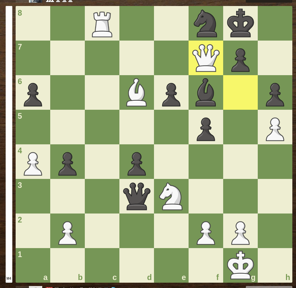

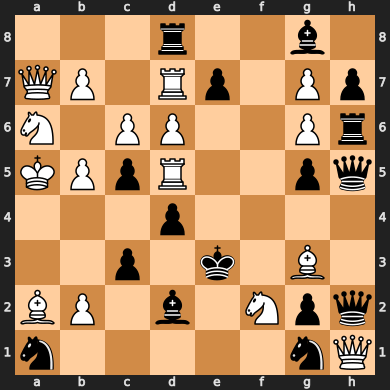

In [2]:
import chess
import base64

from PIL import Image, ImageGrab

def display_array(a, rng=[0,1]):
    a = (a - rng[0])/float(rng[1] - rng[0])*255
    a = np.uint8(np.clip(a, 0, 255))
    img = Image.fromarray(a, "L")
    display(img)

name = "GNZDEYRRF5IVAMKSOAYVA4BPJYYVAUBSKBZC6S2QOBJDE4DRF4ZXANBPGJYDC2ZRIIYS6QSQGFRDCTTQOEXW4NLOKEQHOIBNEAWSAMBAGE======"
image = Image.open(f"images/{name}.png")
display(image.resize((image.width//3, image.height//3)))
board = chess.Board(base64.b32decode(name).decode("ascii"))
display(board)
# print(board.fen())

In [22]:
fen = "RNB1QBNR/PPPKPPPP/8/3P4/3p4/8/pppkpppp/rnb1qbnr w - - 0 1"
print(base64.b32encode(fen.encode()).decode("ascii"))
# string = "KJHEEMKRIJHFEL2QKBIEWUCQKBIC6OBPGNIDILZTOA2C6OBPOBYHA23QOBYHAL3SNZRDC4LCNZZCA5ZAFUQC2IBQEAYQ===="
# print(base64.b32decode(string.encode()).decode("ascii"))

KJHEEMKRIJHFEL2QKBIEWUCQKBIC6OBPGNIDILZTOA2C6OBPOBYHA23QOBYHAL3SNZRDC4LCNZZCA5ZAFUQC2IBQEAYQ====


In [8]:
import chess.engine
from pprint import pprint
stockfish_dir = "engines/stockfish_13_linux_x64_bmi2/stockfish_13_linux_x64_bmi2"
engine = chess.engine.SimpleEngine.popen_uci(stockfish_dir)
for k, v in engine.options.items():
    display(v)

Option(name='Debug Log File', type='string', default='', min=None, max=None, var=[])

Option(name='Contempt', type='spin', default=24, min=-100, max=100, var=[])

Option(name='Analysis Contempt', type='combo', default='Both', min=None, max=None, var=['Off', 'White', 'Black', 'Both'])

Option(name='Threads', type='spin', default=1, min=1, max=512, var=[])

Option(name='Hash', type='spin', default=16, min=1, max=33554432, var=[])

Option(name='Clear Hash', type='button', default=None, min=None, max=None, var=[])

Option(name='Ponder', type='check', default=False, min=None, max=None, var=[])

Option(name='MultiPV', type='spin', default=1, min=1, max=500, var=[])

Option(name='Skill Level', type='spin', default=20, min=0, max=20, var=[])

Option(name='Move Overhead', type='spin', default=10, min=0, max=5000, var=[])

Option(name='Slow Mover', type='spin', default=100, min=10, max=1000, var=[])

Option(name='nodestime', type='spin', default=0, min=0, max=10000, var=[])

Option(name='UCI_Chess960', type='check', default=False, min=None, max=None, var=[])

Option(name='UCI_AnalyseMode', type='check', default=False, min=None, max=None, var=[])

Option(name='UCI_LimitStrength', type='check', default=False, min=None, max=None, var=[])

Option(name='UCI_Elo', type='spin', default=1350, min=1350, max=2850, var=[])

Option(name='UCI_ShowWDL', type='check', default=False, min=None, max=None, var=[])

Option(name='SyzygyPath', type='string', default='<empty>', min=None, max=None, var=[])

Option(name='SyzygyProbeDepth', type='spin', default=1, min=1, max=100, var=[])

Option(name='Syzygy50MoveRule', type='check', default=True, min=None, max=None, var=[])

Option(name='SyzygyProbeLimit', type='spin', default=7, min=0, max=7, var=[])

Option(name='Use NNUE', type='check', default=True, min=None, max=None, var=[])

Option(name='EvalFile', type='string', default='nn-62ef826d1a6d.nnue', min=None, max=None, var=[])

In [52]:
import pyvips
import chess.svg
from PIL import Image
from cairosvg import svg2png
import io
import numpy as np

format_to_dtype = {
    'uchar': np.uint8,
    'char': np.int8,
    'ushort': np.uint16,
    'short': np.int16,
    'uint': np.uint32,
    'int': np.int32,
    'float': np.float32,
    'double': np.float64,
    'complex': np.complex64,
    'dpcomplex': np.complex128,
}

svg = chess.svg.board()
# display(svg)
img_pv = pyvips.Image.new_from_buffer(svg.encode(), "")
a = np.ndarray(buffer=img_pv.write_to_memory(),
               dtype=format_to_dtype[img_pv.format],
               shape=[img_pv.height, img_pv.width, img_pv.bands])
img = Image.fromarray(a)
img.resize((400, 400))
# buffer = img.write_to_buffer(".png")
# Image.frombytes('L', (390, 390), buffer)

(400, 400)